In [1]:
from keras.layers import Activation,Convolution2D, Dropout,Conv2D
from keras.layers import AveragePooling2D,BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

/home/jailson/anaconda3/envs/cnn2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def convenet():
    model = Sequential()
    model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [3]:
def CNN():
    model = Sequential()
    model.add(Convolution2D(filters=16, kernel_size=(5, 5), padding='same',
                            name='image_array', input_shape=(150,150,3)))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=16, kernel_size=(5, 5),
                            strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(.25))

    model.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=32, kernel_size=(3, 3),
                            strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(.25))

    model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=64, kernel_size=(3, 3),
                            strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(.25))

    model.add(Convolution2D(filters=64, kernel_size=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=128, kernel_size=(3, 3),
                            strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(.25))

    model.add(Convolution2D(filters=256, kernel_size=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(filters=128, kernel_size=(3, 3),
                            strides=(2, 2), padding='same'))

    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(.25))
    #model.add(Convolution2D(filters=256, kernel_size=(1, 1), padding='same'))
    #model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3),
    #                        strides=(2, 2), padding='same'))
    #model.add(Convolution2D(filters=128, kernel_size=(3, 3),
    #                        strides=(2, 2), padding='same'))
    model.add(Flatten())
    # model.add(GlobalAveragePooling2D())
    #model.add(Activation('softmax', name='predictions'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(512))
    model.add(Activation('elu'))
    model.add(layers.Dense(1))
    model.add(Activation('softmax'))
    return model

In [4]:
model = CNN()

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 150, 150, 16)      1216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        6416      
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        4640      
__________

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        'cats_and_dogs_small/train',
        target_size = (150,150),
        batch_size = 32,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        'cats_and_dogs_small/validation',
        target_size = (150,150),
        batch_size = 32,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=50) #50

Epoch 1/5
 22/100 [=====>........................] - ETA: 5:24 - loss: 8.5826 - acc: 0.4616

KeyboardInterrupt: 

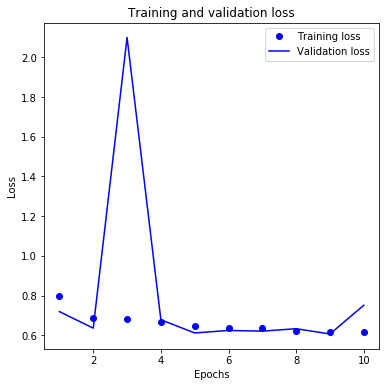

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize= (6,6))
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 432x288 with 0 Axes>

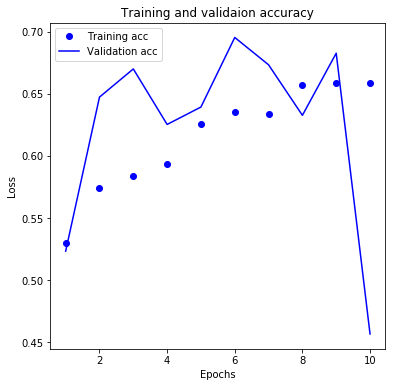

In [23]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize= (6,6))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validaion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()